## Import dependencies

In [152]:
!pip install opendatasets
!pip install pandas
import tensorflow as tf
import opendatasets as od
import pandas as pd
import numpy as np
import cv2 as cv
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os
from PIL import Image

In [20]:
# Download the dataset from the Kaggle API
# od.download('https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols', force=True)

## Preprocess the Colors


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

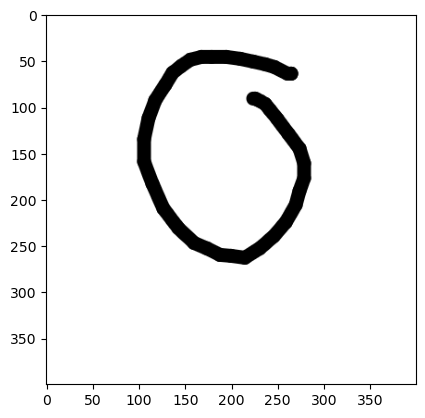

In [21]:
sample_img_path = os.path.join(os.curdir, 'handwritten-math-symbols', 'dataset', '0', '0CdBlhLw.png')
img = np.asarray(Image.open(sample_img_path))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [22]:
# Convert from CMYK to Gray scale
data_dir = os.path.join(os.curdir, 'handwritten-math-symbols', 'dataset')

for image_class in os.listdir(data_dir):
  if image_class.startswith('.'):
    continue
  for image in os.listdir(os.path.join(data_dir, image_class)):
    try:
      image_path = os.path.join(data_dir, image_class, image)
      image = cv.imread(image_path)
      grayImage = cv.cvtColor(image, cv.COLOR_RGBA2RGB)
      cv.imwrite(image_path, grayImage)
    except:
      continue

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

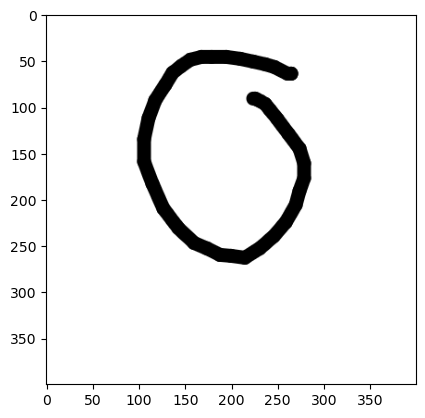

In [23]:
img = np.asarray(Image.open(sample_img_path))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [24]:
batch_size = 8
image_size = (128, 128)
data_set = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size = batch_size, image_size = image_size)

Found 10073 files belonging to 19 classes.


In [25]:
print(repr(img))
print(img.shape)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Preprocess data set

In [26]:
from matplotlib.image import imread
imread(sample_img_path)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [27]:
# Normalize images
data_set = data_set.map(lambda x,y: (x/255, y))


In [28]:
input_shape=(128,128,3)

train_size = int(len(data_set)* .7)
val_size = int(len(data_set)*.2)+1
test_size = int(len(data_set)*.1)+1

In [29]:
train = data_set.take(train_size)
val = data_set.skip(train_size).take(val_size)
test = data_set.skip(train_size + val_size).take(test_size)

## Create Custom Model using Tensorflow

In [17]:
tf_model = models.Sequential(name='Custom_Model')

# Convolutional base
tf_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
tf_model.add(layers.Flatten())
tf_model.add(layers.Dense(64, activation='relu'))
tf_model.add(layers.Dense(19, activation='softmax'))
tf_model.summary()

# The summary shows that the convolutional base has a (4, 4, 64) output, which
#   is flattened into a (1024) shaped vector, and then sent through two Dense
#   layers

tf_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tf_history = tf_model.fit(train, epochs=10,
                    validation_data=val)

tf_model.save(os.path.join(os.curdir, 'models', 'tf_model.h5'))

AttributeError: 'list' object has no attribute 'Sequential'

In [18]:
plt.plot(tf_history.history['accuracy'], label='accuracy')
plt.plot(tf_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = tf_model.evaluate(test, verbose=2)

NameError: name 'tf_history' is not defined

## Create Model using Resnet-50

In [437]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir, validation_split=0.2, subset="training", seed=123,
#     label_mode='categorical', image_size=image_size,
#     batch_size=batch_size)

Found 10073 files belonging to 19 classes.
Using 8059 files for training.


In [438]:
# validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir, validation_split=0.2, subset="validation", seed=123, 
#     label_mode='categorical', image_size=image_size,
#     batch_size=batch_size)

Found 10073 files belonging to 19 classes.
Using 2014 files for validation.


In [442]:
from tensorflow.keras.optimizers import Adam

resnet_model = models.Sequential(name='Resnet_Model')

resnet_pretrained_model= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=input_shape,

                   pooling='max',classes=19,

                   weights='imagenet')

for each_layer in resnet_pretrained_model.layers:

        each_layer.trainable=False

resnet_model.add(resnet_pretrained_model)

In [443]:
resnet_model.add(layers.Flatten())

resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(19, activation='softmax'))

In [444]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

epochs = 10
history = resnet_model.fit(train, validation_data=val, epochs=epochs)
resnet_model.save(os.path.join(os.curdir, 'models', 'resnet_model.h5'))

Epoch 1/10
882/882 [==============================] - 275s 308ms/step - loss: 0.9480 - accuracy: 0.7075 - val_loss: 0.6459 - val_accuracy: 0.7856
Epoch 2/10
882/882 [==============================] - 310s 352ms/step - loss: 0.4671 - accuracy: 0.8508 - val_loss: 0.4571 - val_accuracy: 0.8612
Epoch 3/10
882/882 [==============================] - 320s 363ms/step - loss: 0.3305 - accuracy: 0.8931 - val_loss: 0.4372 - val_accuracy: 0.8567
Epoch 4/10
882/882 [==============================] - 250s 283ms/step - loss: 0.2539 - accuracy: 0.9158 - val_loss: 0.3554 - val_accuracy: 0.8869
Epoch 5/10
882/882 [==============================] - 234s 265ms/step - loss: 0.2157 - accuracy: 0.9296 - val_loss: 0.3634 - val_accuracy: 0.8958
Epoch 6/10
882/882 [==============================] - 289s 328ms/step - loss: 0.1763 - accuracy: 0.9418 - val_loss: 0.3810 - val_accuracy: 0.8725
Epoch 7/10
882/882 [==============================] - 224s 254ms/step - loss: 0.1575 - accuracy: 0.9476 - val_loss: 0.4156 -

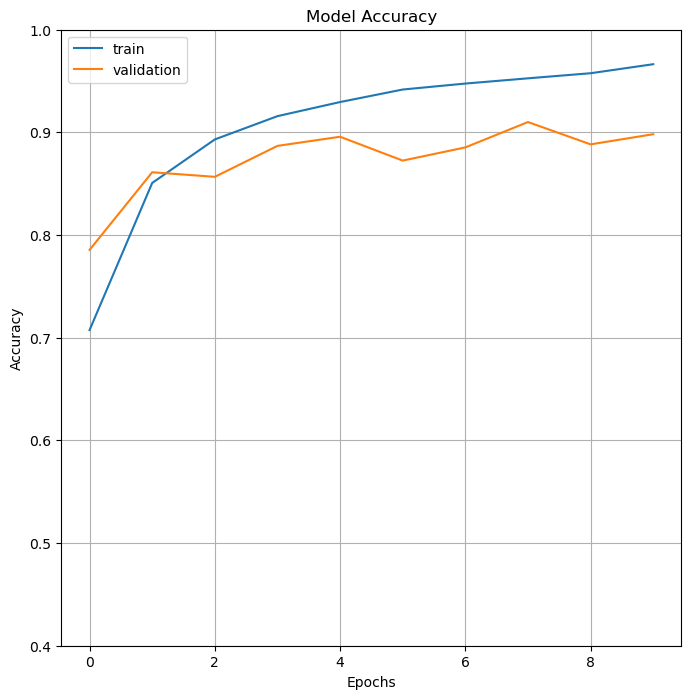

In [445]:
plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

In [446]:
#plotter_lib.show()

plt.savefig('output-plot.png')

<Figure size 640x480 with 0 Axes>

## Create Model using VGG19

In [447]:
from tensorflow.keras.applications import VGG19

In [448]:
vgg19_model = models.Sequential(name='VGG19_Model')

vgg19_pretrained_model= tf.keras.applications.VGG19(include_top=False,

                   input_shape=input_shape,

                   pooling='max',classes=19,

                   weights='imagenet')

for each_layer in vgg19_pretrained_model.layers:
        each_layer.trainable=False

vgg19_model.add(vgg19_pretrained_model)

In [449]:
vgg19_model.add(layers.Flatten())

vgg19_model.add(layers.Dense(512, activation='relu'))

vgg19_model.add(layers.Dense(19, activation='softmax'))

In [450]:
vgg19_model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

epochs = 8
try:
  history = vgg19_model.fit(train, validation_data=val, epochs=epochs)
except Exception as e: print(e)

vgg19_model.save(os.path.join(os.curdir, 'models', 'vgg19_model.h5'))

Epoch 1/8
882/882 [==============================] - 623s 705ms/step - loss: 0.5486 - accuracy: 0.8458 - val_loss: 0.2626 - val_accuracy: 0.9249
Epoch 2/8
882/882 [==============================] - 628s 713ms/step - loss: 0.1733 - accuracy: 0.9449 - val_loss: 0.1275 - val_accuracy: 0.9629
Epoch 3/8
882/882 [==============================] - 629s 713ms/step - loss: 0.1110 - accuracy: 0.9641 - val_loss: 0.1223 - val_accuracy: 0.9545
Epoch 4/8
882/882 [==============================] - 629s 712ms/step - loss: 0.0844 - accuracy: 0.9734 - val_loss: 0.0823 - val_accuracy: 0.9778
Epoch 5/8
882/882 [==============================] - 731s 829ms/step - loss: 0.0638 - accuracy: 0.9796 - val_loss: 0.1105 - val_accuracy: 0.9620
Epoch 6/8
882/882 [==============================] - 947s 1s/step - loss: 0.0633 - accuracy: 0.9804 - val_loss: 0.0975 - val_accuracy: 0.9704
Epoch 7/8
882/882 [==============================] - 931s 1s/step - loss: 0.0539 - accuracy: 0.9812 - val_loss: 0.0659 - val_accuracy

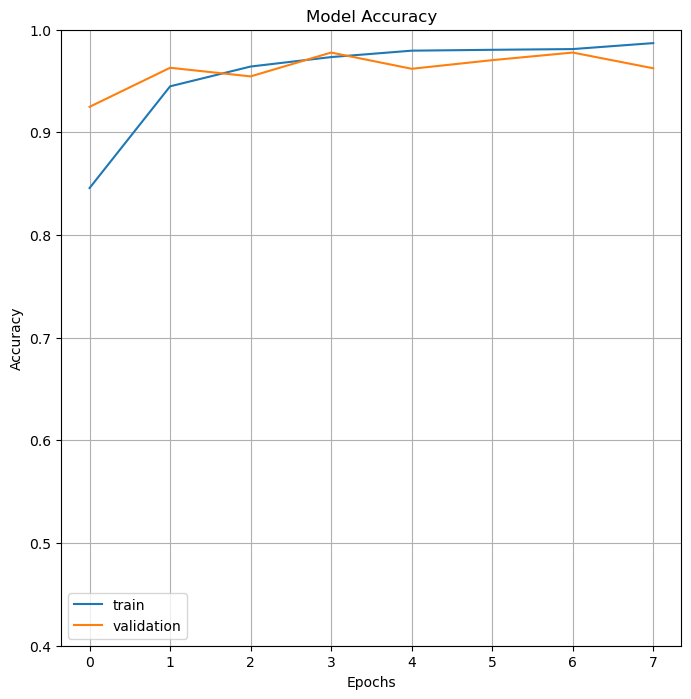

In [451]:
# Test

plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

## Create Model using MobileNet

In [452]:
from tensorflow.keras.applications import MobileNetV2

In [453]:
mobilenet_model = models.Sequential(name='MobileNet_Model')
mobilenet_pretrained_model = tf.keras.applications.MobileNetV2(include_top=False,

                   input_shape=input_shape,

                   pooling='max',classes=19,

                   weights='imagenet')

for each_layer in mobilenet_pretrained_model.layers:
        each_layer.trainable=False

mobilenet_model.add(mobilenet_pretrained_model)

In [454]:
mobilenet_model.add(layers.Flatten())

mobilenet_model.add(layers.Dense(512, activation='relu'))

mobilenet_model.add(layers.Dense(19, activation='softmax'))

In [455]:
mobilenet_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

epochs = 8
try:
  history = mobilenet_model.fit(train, validation_data=val, epochs=epochs)
except Exception as e: print(e)
mobilenet_model.save(os.path.join(os.curdir, 'models', 'mobilenet_model.h5'))

Epoch 1/8
882/882 [==============================] - 156s 164ms/step - loss: 0.4552 - accuracy: 0.8819 - val_loss: 0.2488 - val_accuracy: 0.9195
Epoch 2/8
882/882 [==============================] - 82s 93ms/step - loss: 0.1406 - accuracy: 0.9575 - val_loss: 0.1004 - val_accuracy: 0.9679
Epoch 3/8
882/882 [==============================] - 111s 126ms/step - loss: 0.0914 - accuracy: 0.9731 - val_loss: 0.0672 - val_accuracy: 0.9788
Epoch 4/8
882/882 [==============================] - 78s 89ms/step - loss: 0.0822 - accuracy: 0.9762 - val_loss: 0.1331 - val_accuracy: 0.9590
Epoch 5/8
882/882 [==============================] - 71s 81ms/step - loss: 0.0935 - accuracy: 0.9715 - val_loss: 0.1243 - val_accuracy: 0.9689
Epoch 6/8
882/882 [==============================] - 76s 86ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.1153 - val_accuracy: 0.9723
Epoch 7/8
882/882 [==============================] - 74s 84ms/step - loss: 0.0630 - accuracy: 0.9821 - val_loss: 0.1600 - val_accuracy: 0.

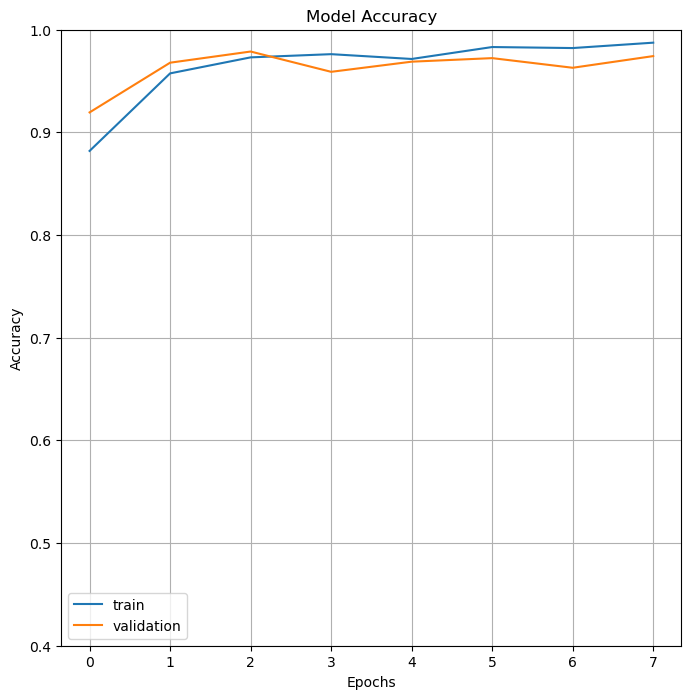

In [456]:
# Test

plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot(epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

## Ensemble

In [153]:
# Load trained models from file system
tf_model_path = os.path.join(os.curdir, 'models', 'tf_model.h5')
resnet_model_path = os.path.join(os.curdir, 'models', 'resnet_model.h5')
vgg19_model_path = os.path.join(os.curdir, 'models', 'vgg19_model.h5')
mobilenet_model_path = os.path.join(os.curdir, 'models', 'mobilenet_model.h5')

models = [models.load_model(tf_model_path),
          models.load_model(resnet_model_path),
          models.load_model(vgg19_model_path),
          models.load_model(mobilenet_model_path)]

In [174]:
# Create the weighted average ensemble model
weights = [0.25, 0.25, 0.25, 0.25]
input_shape = (128, 128, 3)
inputs = layers.Input(shape = input_shape)
outputs = [model(inputs) for model in models]
weighted_average = tf.reshape((), (0, 19)) # An empty tensor

for i in range(0, len(models)):
    if i == 0:
        weighted_average = weights[i] * outputs[i]
    else:
        weighted_average = weighted_average + weights[i] * outputs[i]
    # weighted_average = weighted_average + weights[i] * outputs[i]
    # weighted_average = tf.math.add(weighted_average, weights[i] * outputs[i])
# weighted_average = weights[0]*outputs[0] + weights[1]*outputs[1] + weights[2]*outputs[2] + weights[3]*outputs[3]

ensemble_model = tf.keras.Model(inputs = inputs, outputs = weighted_average, name = 'Ensemble_Model')

In [175]:
ensemble_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# ensemble_model.save(os.path.join(os.curdir, 'models', 'ensemble_model.h5'))

In [176]:
ensemble_model.evaluate(test)

125/125 [==============================] - 71s 515ms/step - loss: 0.0494 - accuracy: 0.9990


[0.04942608252167702, 0.9989929795265198]

## Testing

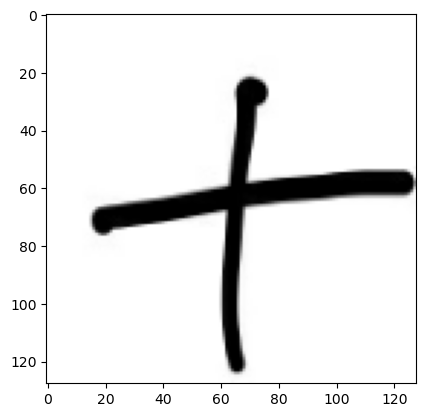

In [177]:
# Testing the ensemble model

iterator = test.__iter__()
current = iterator.get_next()
plt.imshow(current[0][0])

In [178]:
ensemble_model_prediction = ensemble_model.predict(current[0])
print(ensemble_model_prediction[0])

1/1 [==============================] - 4s 4s/step
[1.3686294e-15 9.8814068e-09 2.1662310e-14 8.7553592e-16 2.1820261e-08
 1.0118819e-17 4.5938350e-16 6.4169538e-11 1.2153717e-19 1.1102973e-16
 9.9999988e-01 1.1176121e-09 1.0956382e-08 1.5549474e-10 1.0081682e-07
 3.2015713e-11 5.7363858e-10 1.7625284e-13 2.1577069e-10]


In [90]:
tf_model_path = os.path.join(os.curdir, 'models', 'tf_model.h5')
tf_model = tf.keras.models.load_model(tf_model_path)
tf_model_prediction = tf_model.predict(current[0])
print(tf_model_prediction[0])

1/1 [==============================] - 0s 140ms/step
[1.2963983e-23 6.5498613e-38 2.2342218e-17 1.0000000e+00 5.0147218e-36
 1.1583550e-12 1.0977082e-28 6.0935034e-17 2.5564692e-19 1.3496759e-25
 3.2999937e-29 2.2435751e-31 7.8795881e-19 5.1149185e-20 1.7103845e-34
 1.8181394e-28 5.9333665e-34 2.8853886e-27 1.7111255e-15]


In [79]:
resnet_model_path = os.path.join(os.curdir, 'models', 'resnet_model.h5')
resnet_model = tf.keras.models.load_model(resnet_model_path)
resnet_model_prediction = resnet_model.predict(current[0])
print(resnet_model_prediction[0])

1/1 [==============================] - 1s 1s/step
[4.8073665e-03 2.1124008e-04 4.8093472e-04 4.2893257e-02 5.8125859e-01
 4.3319250e-03 3.2396042e-01 3.0370859e-02 4.8943241e-03 5.2744540e-04
 4.5870766e-03 2.7251538e-04 4.4602377e-04 7.0692047e-05 4.4657881e-04
 6.2987459e-07 2.7798739e-04 1.5602724e-04 6.1140463e-06]


In [80]:
vgg19_model_path = os.path.join(os.curdir, 'models', 'vgg19_model.h5')
vgg19_model = tf.keras.models.load_model(vgg19_model_path)
vgg19_model_prediction = vgg19_model.predict(current[0])
print(vgg19_model_prediction[0])

1/1 [==============================] - 1s 550ms/step
[2.0884801e-08 6.8905734e-07 5.5016631e-06 1.2961111e-07 9.7798723e-01
 1.1418805e-07 1.4770643e-06 8.0598265e-06 6.2583825e-07 4.0960071e-09
 1.6212696e-04 3.1273658e-04 8.6289435e-07 1.2211451e-04 2.0604305e-02
 7.2381608e-06 6.9767790e-04 4.3052347e-05 4.6214071e-05]


In [81]:
mobilenet_model_path = os.path.join(os.curdir, 'models', 'mobilenet_model.h5')
mobilenet_model = tf.keras.models.load_model(mobilenet_model_path)
mobilenet_model_prediction = mobilenet_model.predict(current[0])
print(mobilenet_model_prediction[0])

1/1 [==============================] - 1s 998ms/step
[1.1211676e-18 3.7104139e-12 2.1202408e-15 2.7246234e-16 1.0000000e+00
 5.7251497e-16 1.8293008e-14 2.7684395e-15 1.8742063e-15 2.9881388e-14
 2.8812092e-08 4.1646070e-12 2.0955184e-12 1.4144499e-15 2.3618817e-08
 8.7005080e-19 3.0175959e-10 1.1378387e-09 1.4891712e-12]


In [469]:
tf_model.evaluate(test)

125/125 [==============================] - 4s 20ms/step - loss: 1.0100 - accuracy: 0.8781


[1.0100042819976807, 0.8781470060348511]

In [474]:
mobilenet_model.evaluate(test)
resnet_model.evaluate(test)
vgg19_model.evaluate(test)

125/125 [==============================] - 140s 1s/step - loss: 0.0713 - accuracy: 0.9768


[0.07127068191766739, 0.9768378734588623]